# Importing Libraries

In [1]:
import pandas as pd
#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


# Algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
loan=pd.read_csv('fraud_loan_detection.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.shape

(614, 13)

614 rows and 13 columns present in this dataset.

# Statistical Description

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Applicant income is int and coapplicant income ,loan amount,loan amount term,credit histroy is in float other than all these every other feature is in object format .

In [6]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Minimum applicant income is 150 /- and Maximum is 81000,minimum Coapplicantincome is 0 and max is 41667.

# Exploratory Data Analysis

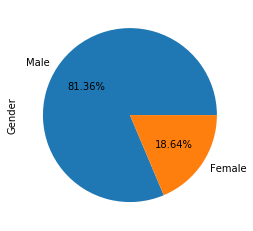

In [7]:
loan['Gender'].value_counts().plot.pie(autopct="%2.2f%%")

Here you can observe that who applyed for loan most of them are males and the percentage is 81% and females % is 19.

### Weather Graduates or Not_Graduate Applicant_income is more?

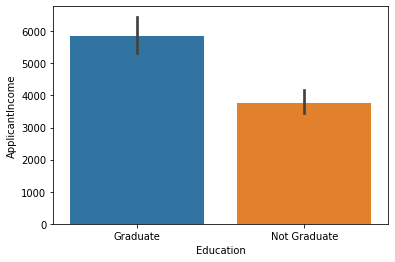

In [8]:
sns.barplot(x='Education',y='ApplicantIncome',data=loan)

From here we can observe that Who did their graduation that applicant income is more compare to who are not completed their graduation.

### Whose property credit history is good weather is in Rural_area or Urban_area?

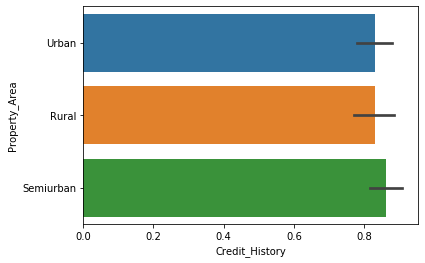

In [9]:
sns.barplot(x='Credit_History',y='Property_Area',data=loan)

for Semiurban area credit_history is good compared to all other rural and urban area.

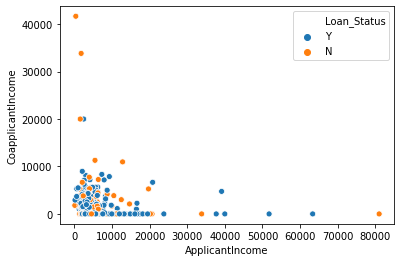

In [10]:
sns.scatterplot(x='ApplicantIncome',y='CoapplicantIncome',hue='Loan_Status',data =loan)

Here we can observe that whose applicant income is less than 25000 and coapplicantincome is lessthan 10000 in most cases Loan has been sanctioned.

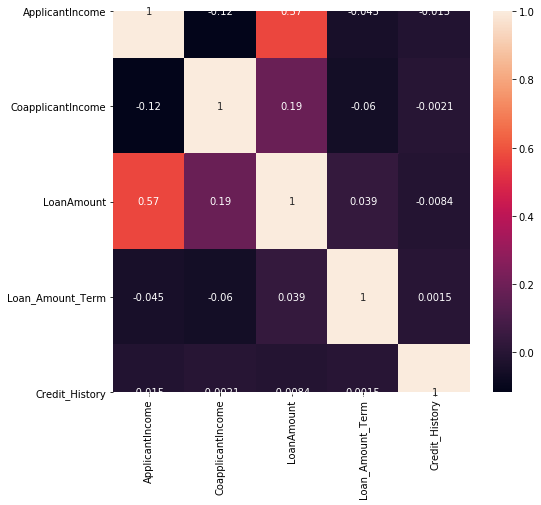

In [11]:
#check cor-relation
corr_hmap=loan.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)

Observation:
>Here we can observe that Loan_amount_term is completely highly negatively cor-relate with Applicant_income and Co-applicantincome.
>Applicant income is negatively cor-relate with Coapplicant income.

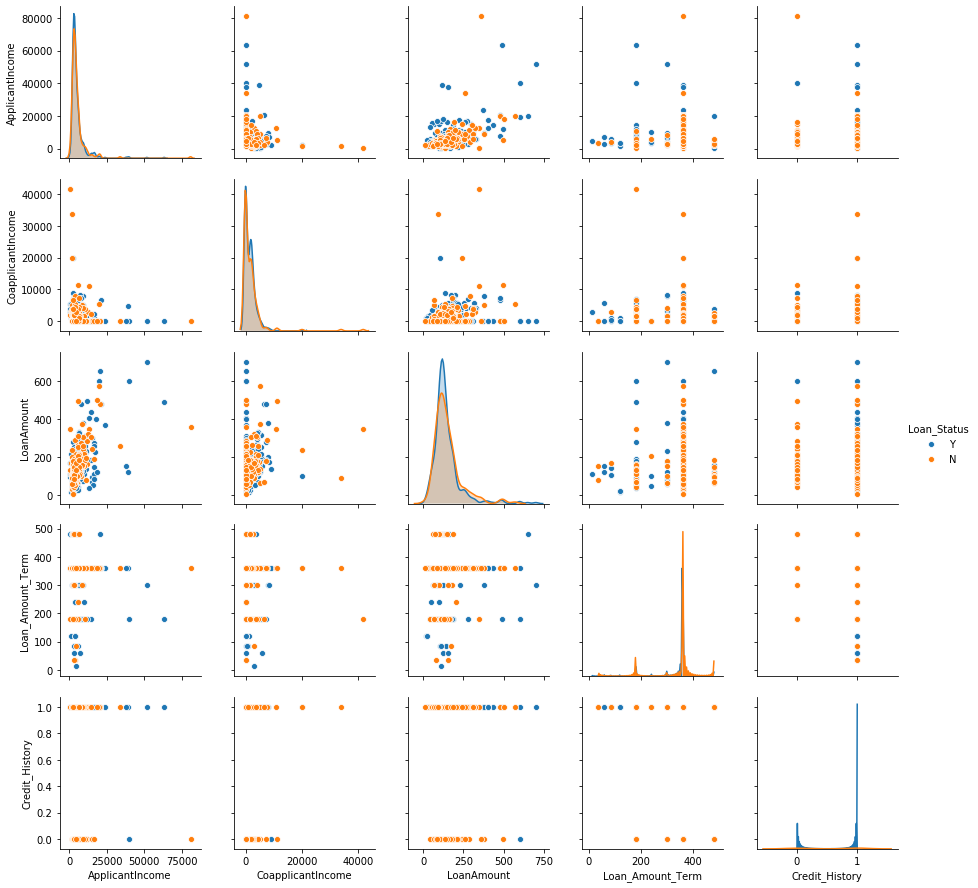

In [12]:
sns.pairplot(loan ,hue ='Loan_Status', vars =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

# Data Preprocessing

In [13]:
loan.columns=['Loan_id','Gender','Married','Dependents','Education','Self_employed','Applicant_income','Co_applicant_income','Loan_amount','Loan_amount_term','Credit_history','Property_area','Loan_status']

In [14]:
loan.head()

,Loan_id,Gender,Married,Dependents,Education,Self_employed,Applicant_income,Co_applicant_income,Loan_amount,Loan_amount_term,Credit_history,Property_area,Loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


here you can observe all the column names had been changed.

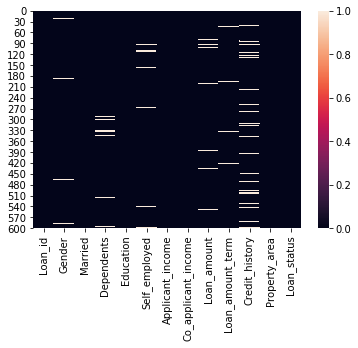

In [15]:
sns.heatmap(loan.isnull())

> Above we can see that credit_history ,loan_amount_term,self_employed,and dependentsand gender ,Loan_amount has null values and need to remove those null values.

##### loan amount

In [16]:
loan['Loan_amount'].isnull().sum()

22

There is a null values and nedd to fill with mean values .

In [17]:
loan['Loan_amount'].fillna(loan['Loan_amount'].mean(),inplace=True)

In [18]:
loan['Loan_amount'].isnull().sum()

0

It's clear now there is no null data.

#### Gender

Gender has null values and i'm going to fill with most common one.

In [19]:
loan['Gender'].isnull().sum()

13

In [20]:
loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [21]:
loan['Gender'].fillna('Male',inplace=True)

In [22]:
loan['Gender'].isnull().sum()

0

##### Credit Histroy

In [23]:
loan['Credit_history'].isnull().sum()

50

Credit history has null values and need to fill with most common one.

In [24]:
loan['Credit_history'].value_counts()

1.0    475
0.0     89
Name: Credit_history, dtype: int64

In [25]:
loan['Credit_history'].fillna('1',inplace=True)

In [26]:
loan['Credit_history'].isnull().sum()

0

Now it's clear there is no null datain this column now.

##### Dependents

In [27]:
loan['Dependents'].isnull().sum()

15

15 missing values are there and i'm going to fill with most common one.

In [28]:
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:
loan['Dependents']=loan['Dependents'].replace('3+','3')

In [30]:
loan['Dependents'].fillna(loan['Dependents'].median(),inplace=True)

In [31]:
loan['Dependents'].isnull().sum()

0

##### Loan amount term

In [32]:
loan['Loan_amount_term'].isnull().sum()

14

14 null values are there .

In [33]:
loan['Loan_amount_term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_amount_term, dtype: int64

In [34]:
loan['Loan_amount_term'].fillna('360',inplace=True)

In [35]:
loan['Loan_amount_term'].isnull().sum()

0

##### Self employed

In [36]:
loan['Self_employed'].isnull().sum()

32

32 null values are there in self employed attribute.

In [37]:
loan['Self_employed'].value_counts()

No     500
Yes     82
Name: Self_employed, dtype: int64

In [38]:
loan['Self_employed'].fillna('No',inplace=True)

In [39]:
loan['Self_employed'].isnull().sum()

0

Upto now cleaning null data had been finished let's check again null values present or not.

In [40]:
#transforming data from string to int format
le=LabelEncoder()
list1=['Gender','Married','Education','Self_employed','Property_area','Loan_status']
for val in list1:
    loan[val]=le.fit_transform(loan[val].astype(str))

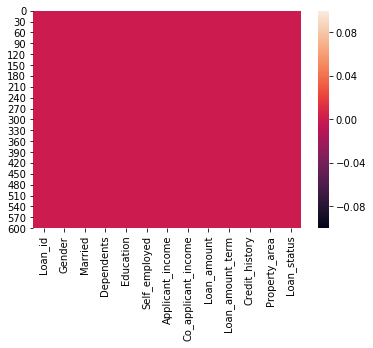

In [41]:
sns.heatmap(loan.isnull())

Now you may see the difference between above two heatmaps. upto now data cleansing is done.

In [42]:
loan.head()

,Loan_id,Gender,Married,Dependents,Education,Self_employed,Applicant_income,Co_applicant_income,Loan_amount,Loan_amount_term,Credit_history,Property_area,Loan_status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360,1,2,1


Loan_id is not necessary and it's better to drop this column.

In [43]:
loan.drop('Loan_id',inplace=True,axis=1)

In [44]:
loan.head()

,Gender,Married,Dependents,Education,Self_employed,Applicant_income,Co_applicant_income,Loan_amount,Loan_amount_term,Credit_history,Property_area,Loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360,1,2,1


In [45]:
loan['Dependents'].value_counts()

0      345
1      102
2      101
3       51
0.0     15
Name: Dependents, dtype: int64

In [46]:
loan['Dependents']=loan['Dependents'].replace('3+','3')

# Converting Features

In [47]:
loan['Co_applicant_income']=loan['Co_applicant_income'].astype(int)

In [48]:
loan['Loan_amount']=loan['Loan_amount'].astype(int)
loan['Education']=loan['Education'].astype(int)
loan['Loan_amount_term']=loan['Loan_amount_term'].astype(int)
loan['Credit_history']=loan['Credit_history'].astype(int)
loan['Dependents']=loan['Dependents'].astype(int)

In [49]:
loan.head()

,Gender,Married,Dependents,Education,Self_employed,Applicant_income,Co_applicant_income,Loan_amount,Loan_amount_term,Credit_history,Property_area,Loan_status
0,1,0,0,0,0,5849,0,146,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1


# Detecting and Removal of Outliers

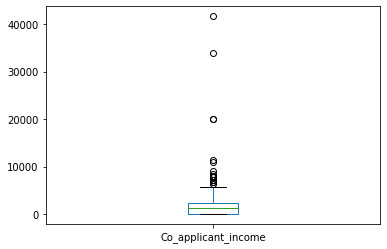

In [50]:
loan['Co_applicant_income'].plot.box()

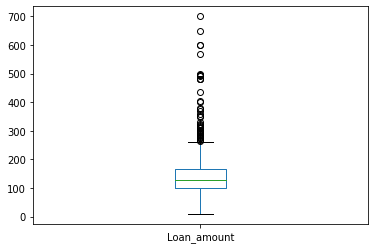

In [51]:
loan['Loan_amount'].plot.box()

Gender                    AxesSubplot(0.125,0.749828;0.227941x0.130172)
Married                AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Dependents             AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Education                 AxesSubplot(0.125,0.593621;0.227941x0.130172)
Self_employed          AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Applicant_income       AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Co_applicant_income       AxesSubplot(0.125,0.437414;0.227941x0.130172)
Loan_amount            AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Loan_amount_term       AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Credit_history            AxesSubplot(0.125,0.281207;0.227941x0.130172)
Property_area          AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Loan_status            AxesSubplot(0.672059,0.281207;0.227941x0.130172)
dtype: object

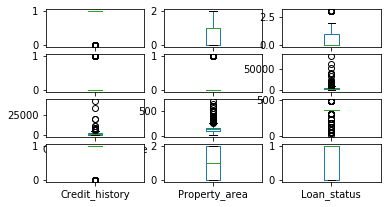

In [52]:
loan.plot(kind='box',subplots=True,layout=(5,3))

Here you can see that there is outliers present in this dataset and need to remove those.

In [53]:
#removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(loan))
z

array([[0.47234264, 1.35784704, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.70581158, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.70581158, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.70581158, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.70581158, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.35784704, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [54]:
threshold=3
np.where((z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [55]:
z[9][6]

3.1967126315791003

In [56]:
z[130][8]

2.1372759162519452

In [57]:
z[506][7]

3.972923884604463

In [58]:
loan_new=loan[(z<3).all(axis=1)]#removing outliers

In [59]:
loan.shape

(614, 12)

In [60]:
loan_new.shape

(577, 12)

37 rows had been removed as an outliers.

# Check Distribution of skewness

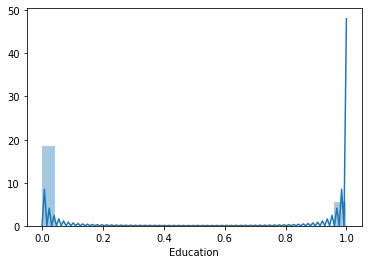

In [61]:
sns.distplot(loan_new['Education'])

In [62]:
collist=loan_new.columns
ncol=12
nrows=10

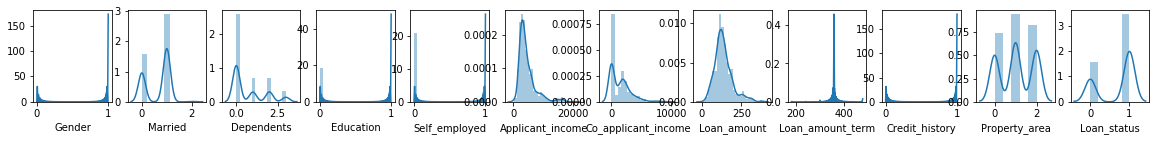

In [63]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(loan_new[collist[i]])

In [64]:
x=loan_new.iloc[:,:-1]
x.head()

,Gender,Married,Dependents,Education,Self_employed,Applicant_income,Co_applicant_income,Loan_amount,Loan_amount_term,Credit_history,Property_area
0,1,0,0,0,0,5849,0,146,360,1,2
1,1,1,1,0,0,4583,1508,128,360,1,0
2,1,1,0,0,1,3000,0,66,360,1,2
3,1,1,0,1,0,2583,2358,120,360,1,2
4,1,0,0,0,0,6000,0,141,360,1,2


In [65]:
y=loan_new.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_status, dtype: int32

In [66]:
x.skew()

Gender                -1.622920
Married               -0.517759
Dependents             1.052106
Education              1.306588
Self_employed          2.252848
Applicant_income       2.148522
Co_applicant_income    1.350518
Loan_amount            1.114116
Loan_amount_term      -2.098806
Credit_history        -1.976043
Property_area         -0.055332
dtype: float64

Above we can observe that there is alot of outliers present in this dataset.

In [67]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [68]:
x.skew()

Gender                -1.622920
Married               -0.517759
Dependents             0.712539
Education              1.306588
Self_employed          2.252848
Applicant_income      -0.204913
Co_applicant_income   -0.216748
Loan_amount           -0.697421
Loan_amount_term      -2.098806
Credit_history        -1.976043
Property_area         -0.055332
dtype: float64

# Building a machine Learning Model

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=12,random_state=44
                                               
                                              )

In [70]:
x_train.shape

(565, 11)

In [71]:
x_test.shape

(12, 11)

In [72]:
y_train.shape

(565,)

In [73]:
y_test.shape

(12,)

In [74]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [75]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [76]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

************** DecisionTreeClassifier ***********


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


accuracy score 0.75
Cross-val-score= 0.7231868131868132


roc_auc_score 0.65


              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.89      0.80      0.84        10

    accuracy                           0.75        12
   macro avg       0.61      0.65      0.62        12
weighted avg       0.80      0.75      0.77        12



[[1 1]
 [2 8]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


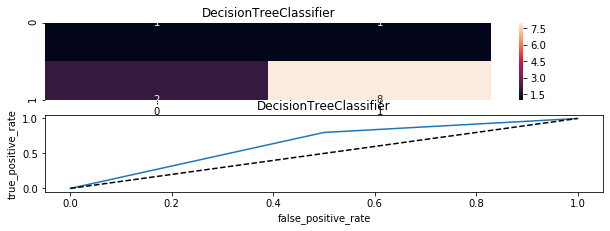

************** RandomForestClassifier ***********


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


accuracy score 0.8333333333333334
Cross-val-score= 0.7789194139194139


roc_auc_score 0.7


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.90      0.90      0.90        10

    accuracy                           0.83        12
   macro avg       0.70      0.70      0.70        12
weighted avg       0.83      0.83      0.83        12



[[1 1]
 [1 9]]


AxesSubplot(0.125,

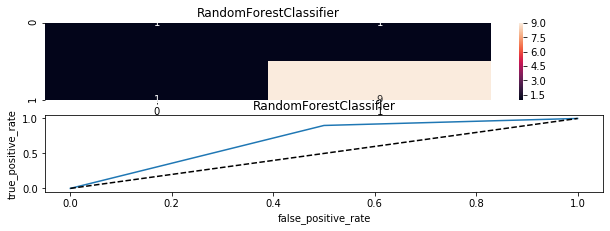

************** KNeighborsClassifier ***********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy score 0.9166666666666666
Cross-val-score= 0.7509249084249084


roc_auc_score 0.75


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.91      1.00      0.95        10

    accuracy                           0.92        12
   macro avg       0.95      0.75      0.81        12
weighted avg       0.92      0.92      0.90        12



[[ 1  1]
 [ 0 10]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


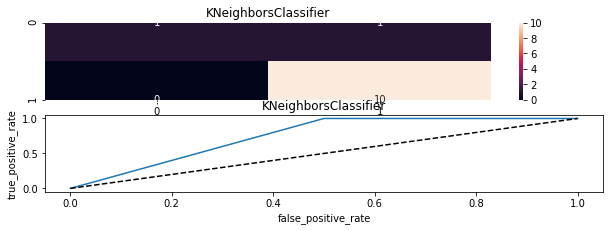

************** SGDClassifier ***********


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


accuracy score 0.75
Cross-val-score= 0.575054945054945


roc_auc_score 0.65


              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.89      0.80      0.84        10

    accuracy                           0.75        12
   macro avg       0.61      0.65      0.62        12
weighted avg       0.80      0.75      0.77        12



[[1 1]
 [2 8]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


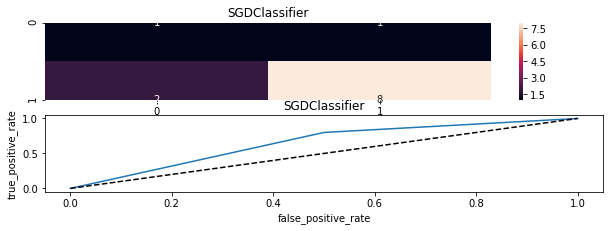

************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.9166666666666666
Cross-val-score= 0.8193315018315019


roc_auc_score 0.75


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.91      1.00      0.95        10

    accuracy                           0.92        12
   macro avg       0.95      0.75      0.81        12
weighted avg       0.92      0.92      0.90        12



[[ 1  1]
 [ 0 10]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


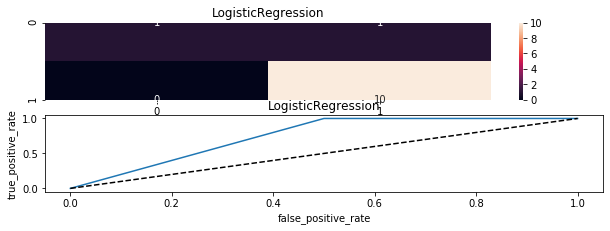

In [77]:
seed=7
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))



#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(random_state=seed)
    cv=model_selection.cross_val_score(model,x,y,cv=40,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [78]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score,'rocscore':rocscore},columns=['Model','cvs','score','rocscore'])
result

,Model,cvs,score,rocscore
0,DecisionTreeClassifier,72.318681,75.000000,65.0
1,RandomForestClassifier,77.891941,83.333333,70.0
2,KNeighborsClassifier,75.092491,91.666667,75.0
3,SGDClassifier,57.505495,75.000000,65.0
4,LogisticRegression,81.933150,91.666667,75.0


# Hyperparameter Tuning

In [79]:
param_grid ={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV, cross_val_score
lg= LogisticRegression( random_state=1)
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(x_train, y_train)
grid.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.686, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.686, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.751, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.713, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.723, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.676, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.783, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.830, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.778, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.851, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.819, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [80]:
grid_predictions=grid.predict(x_test)
grid_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [81]:
score=accuracy_score(y_test,grid_predictions)
score

0.9166666666666666

# Predting Values

In [82]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("predicted wins",grid_predictions)
print("actual wins",y_test)

predicted wins [1 1 1 1 1 1 1 1 1 0 1 1]
actual wins 91     1
330    1
188    1
74     1
385    1
187    1
403    1
475    1
379    1
412    0
174    0
441    1
Name: Loan_status, dtype: int32


# Saving Model

In [83]:
loan_new=pd.DataFrame(grid_predictions)
loan_new.to_csv('lg_loan.csv')

In [84]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(lg,'loan.obj')
#load the model from a file
dct_from_joblib=joblib.load('loan.obj')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

Upto now training model had been done.